# TP 9 : Applications de la méthode de Newton



Durant ce TP, nous verrons quelques applications de la méthode de Newton. 

Au programme:
1. Résoudre une équation différentielle à l'aide de la méthode de Newton.
2. L'estimation de paramètres avec Gauss-Newton.
3. A venir: Vecteurs propres et valeurs propres via Newton.

Commençons par importer quelques paquets de Python. De plus, on va ré-utiliser la fonction `Newton_vectoriel` définie dans le précédent TP.

In [ ]:
# Paquets de Python
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import diags

# Newton vectoriel
def Newton_vectoriel(f, df, x0, max_iter, tol):
    """Méthode de Newton vectoriel.
    L'itération s'arrête lorsque le nombre maximal d'itérations est atteint,
    ou bien lorsque la différence entre deux itérations est plus petite que la tolérance donnée.

    Entrées
    -------
    f : callable
        Fonction du problème; y = f(x)
    df : callable
        Dérivée de f; z = df(x)
    x0 : ndarray
        Valeur initiale
    max_iter : int
        Nombre maximal d'itérations
    tol : float
        Tolérance pour la convergence

    Sorties
    -------
    xk: list
        Liste des valeurs de x à chaque itération
    """
    xk = [x0]
    for k in np.arange(max_iter):
        x1 = xk[-1] - np.linalg.solve(df(xk[-1]), f(xk[-1]))
        xk.append(x1)
        if np.linalg.norm(x1 - xk[-2]) < tol:
            break
    return xk

## Exercice 1. Discrétisation d'une équation aux dérivées partielles


Considérons l'équation différentielle non-linéaire avec conditions aux bords

$$
\begin{align*}
&v''(t) + 2 e^{v(t)} - \sin(v(t)) = 0, \quad 0 < t < 1, \\ 
&v(0) = v(1) = 0.
\end{align*}
$$

Nous allons approximer une solution $v(t)$ numériquement. Pour cela, on commence par discrétiser l'intervalle $[0, 1]$ en $n+1$ sous-intervalles égaux. On obtient alors les points 

$$t_i = ih = \frac{i}{n+1}, \quad i = 0, 1, 2, \ldots, n.$$

On s'intéresse donc aux valeurs de la fonction aux points discrets $$v_i = v(t_i), \quad i = 0, 1, \ldots, n+1.$$ En particulier, les conditions de bords impliquent que $v_0 = v_{n+1} = 0$. De plus, on peut utiliser une différence finie pour obtenir que

$$\frac{v_{i+1} - 2 v_i + v_{i-1}}{h^2} + 2 e^{v_i} - \sin(v_i) = 0, \quad i = 1, 2, \ldots, n.$$

Sous forme matricielle, ce problème est équivalent à résoudre le système linéaire

$$F(\pmb{v}) = \begin{pmatrix} -2 & 1 & & \\ 1 & -2 & \ddots & \\ & \ddots & \ddots & 1 \\ & & 1 & -2 \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{pmatrix} + h^2 \begin{pmatrix} 2 e^{v_1} - \sin(v_1) \\ 2 e^{v_2} - \sin(v_2) \\ \vdots \\ 2 e^{v_n} - \sin(v_n) \end{pmatrix} = 0.$$

- Calculer la racine $F(\pmb{v}) = 0$ par la méthode de Newton, et tracer la solution $v(t)$. Vous pouvez configurer le problème avec une taille $n=24$, et utiliser la tolérance $tol = 10^{-7}$ pour la méthode de Newton. Utiliser une valeur initiale nulle.

**Indication:**
Pour faire une matrice tridiagonale dans Python, vous pouvez utiliser la commande `diags` du package `scipy.sparse`. Pour cela, il faut donner les composantes des diagonales et préciser leur emplacements avec l'argument `offset`. Par exemple, ici, `offset = [-1, 0, 1]`. Pour plus d'informations, voir la documentation de la fonction.

Lorsque vous tracez la solution, n'oubliez pas d'ajouter les conditions aux bords. Pour cela, vous pouvez utiliser la fonction `np.concatenate` pour concaténer de nouvelles valeurs au vecteur solution.

In [ ]:
# VOTRE CODE ICI




- Utiliser le vecteur de départ $$\pmb{v}_0 = \alpha \begin{pmatrix} t_1 (1-t_1) \\ \vdots \\ t_n (1-t_n) \end{pmatrix}$$ avec différents paramètres $\alpha$ (disons, 0 et 15) et observer la solution vers laquelle l'algorithme converge. 

In [ ]:
n = 24
ts = np.linspace(0, 1, n)

# Cas alpha = 0
# VOTRE CODE ICI

# Cas alpha = 15
# VOTRE CODE ICI

# Affichage des solution
# VOTRE CODE ICI




## Exercice 2. Gauss-Newton

Considérons le problème de minimisation non-linéaire

$$\min_x \frac{1}{2} \| r(x) \|^2_2. $$

où $r : \mathbb{R}^n \to \mathbb{R}^m$ avec $m > n$. 

La méthode de Gauss-Newton procède de la manière suivante:

1. Minimiser avec les moindres carrés : $\| r'(x^{(k)}) p_k + r(x^{(k)}) \|_2 \rightarrow \min.$
2. Calculer : $x^{(k+1)} = x^{(k)} + p_k.$

Pour rappel, un vecteur $x^*$ minimise $\|Ax  - b \|$ si, et seulement si, il vérifie les équations normales $A^T A x^* = A^T b$.

- Implémenter la méthode de Gauss-Newton.

**Indication:** Pour résoudre les équations normales, vous pouvez utiliser une des méthodes que nous avons vu dans les TPs précédents, comme la décomposition de Cholesky ou la décomposition QR. Alternativement, vous pouvez utiliser la fonction `np.linalg.solve` pour résoudre le système linéaire.


In [ ]:
def GaussNewton(r, dr, x0, tol, max_iter):
    """Algorithme de Gauss-Newton
    
    Entrées
    -------
    r : callable
        Fonction à minimiser
    dr : callable
        Gradient de la fonction à minimiser
    x0 : ndarray
        Point de départ
    tol : float
        Tolérance sur la norme du gradient
    max_iter : int
        Nombre maximal d'itérations

    Sorties
    -------
    xk_list: list
        La liste des itérations de l'algorithme
    """
    # VOTRE CODE ICI
    

Pour tester la méthode, on génère des données en utilisant la fonction 
$$u(t) = 1.5 e^{-2.5 t} \cos(15 t), \quad \text{ où } t_i = 0.02 (i-1), \quad i = 1, \ldots 51.$$
Ensuite, on ajoute du bruit aléatoire à $u(t_i)$ pour obtenir des données $b_i$.

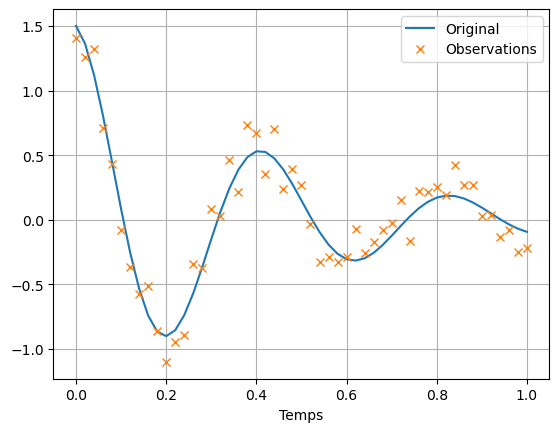

In [16]:
# Génère les données
ts = np.linspace(0, 1, 51)
u = 1.5 * np.exp(-2.5*ts) * np.cos(15*ts)
facteur_bruit = 0.25
b = u + facteur_bruit * (np.random.uniform(-1, 1, size=51))

# Plot des données
plt.figure()
plt.plot(ts, u, label='Original')
plt.plot(ts, b, 'x', label='Observations')
plt.grid()
plt.xlabel('Temps')
plt.legend()
plt.show()


Maintenant, l'idée est d'utiliser nos données pour approcher une fonction de la forme 
$$v(t) = x_1 e^{x_2 t} \cos(x_3 t).$$

Ainsi, la $i$-ème ligne du résidu $\pmb{r}$ et $dr$ sont définies par 

$$r_i = b_i - x_1 e^{x_2 t_i} \cos(x_3 t_i), \quad dr_{i,1} = - e^{x_2 t_i} \cos (x_3 t_i),$$

$$dr_{i,2} = - t_i x_1 e^{x_2 t_i} \cos (x_3 t_i), \quad dr_{i, 3} = t_i x_1 e^{x_2 t_i} \sin (x_3 t_i),$$

où $i = 1, \ldots, 51$. 

- Mettre en oeuvre la méthode de Gauss-Newton sur ce problème pour reconstituer la valeur de $\pmb{x} = (x_1, x_2, x_3)$ avec le choix initial $\pmb{x}_0 = (1.8, -2.7, 18)$ et une tolérance $tol = 10^{-7}$. 
- Qu'obtient-ton pour $\pmb{x}$ ? 
- Quelle est la valeur du résidu $\| \pmb{r} \|$ correspondant ?
- Reproduire la figure précédente en ajoutant la fonction estimée par la méthode de Gauss-Newton.

In [ ]:
# VOTRE CODE ICI



Maintenant, générez trois jeux de données:
- un sans bruit,
- un avec un petit bruit (facteur 0.25),
- un avec plus de bruit (facteur 1).

Pour chaque jeu de données, appliquez Gauss-Newton et affichez la convergence de la méthode. Qu'observez-vous ?

In [ ]:
# Fixons l'aléatoire
np.random.seed(1111)

# VOTRE CODE ICI


** Votre observation ici **

On observe que :
- Avec le facteur de bruit $0$, la convergence est quadratique.
- Avec le facteur de bruit $0.25$, la convergence est superlinéaire.
- Avec le facteur de bruit $1$, la convergence est linéaire.

Ainsi, plus le bruit dans les données est importants, plus il faudra d'itérations pour converger vers une solution.

## Exercice 3. Méthode de Newton pour le calcul des valeurs et vecteurs propres

Dans cet exercice, nous vous demandons d'utiliser la méthode de Newton pour calculer les valeurs et vecteurs propres d'une matrice $A$. Pour cela, vous pouvez écrire le problème des valeurs propres $A \pmb{v} = \lambda \pmb{v}$ comme l'équation non-linéaire suivante:

$$f\left(\begin{bmatrix} \pmb{v} \\ \lambda \end{bmatrix}\right) = \begin{bmatrix} (A - \lambda I) \pmb{v} \\ \frac{1}{2} \pmb{v}^T \pmb{v} - 1 \end{bmatrix} = 0.$$

Ainsi, en calculant les racines de $f$, on résout la paire valeur/vecteur propre normalisé $A \pmb{v} = \lambda \pmb{v}$, avec $\| \pmb{v} \|_2^2 = 2$.

- Compléter la fonction `newton_eigh` ci-dessous qui résout le problème ci-dessus au moyen de la méthode de Newton.



In [ ]:
def newton_eigh(A, v0, lam0, max_iter, tol):
    """Vecteur et valeur propres par la méthode de Newton.

    Entrées
    -------
    A: ndarray
        Matrice symétrique dont il faut trouver les vecteurs et valeurs propres
    v0: ndarray
        Valeur initiale du vecteur propre
    lam0: float
        Valeur initiale de la valeur propre
    max_iter: int
        Nombre maximal d'itérations pour la méthode de Newton
    tol: float
        Tolerance pour la méthode de Newton

    Sorties
    -------
    vk: list
        Liste des vecteurs calculés par la méthode de Newton
    lamk: list
        Liste des valeurs calculées par la méthode de Newton
    """

    # VOTRE CODE ICI

    

### Matrices symétriques

Le code ci-dessous génère une matrice $A$ symétrique.

- A l'aide de la fonction `np.linalg.eigh`, calculer les valeurs et vecteurs propres de $A$.
- Tester la méthode `newton_eigh` sur cette même matrice $A$, et comparer les résultats avec ceux de `np.linalg.eigh`.

**Indication:** 
- Perturber les valeurs propres et vecteurs propres trouvés par `np.linalg.eigh` pour initialiser la méthode de Newton.
- Pour calculer le sinus entre deux vecteurs, vous pouvez utiliser la fonction `subspace_angles` du package `scipy.linalg`. Pour cela, il faut donner les vecteurs sous forme de colonnes. Par exemple, si $v$ et $w$ sont des vecteurs, alors `subspace_angles(v[:, None], w[:, None])` renvoie le sinus entre les deux vecteurs.

In [ ]:
from scipy.linalg import subspace_angles

# Génération d'une matrice A symétrique
n = 100
np.random.seed(1111)
D = np.diag(np.linspace(1, 10, n))
Q, _ = np.linalg.qr(np.random.rand(n, n))
A = Q @ D @ Q.T

# VOTRE CODE ICI



Toujours avec la même matrice $A$:

- Tracer les courbes des erreurs $| \lambda^{(k)} (A) - \lambda_{\min} (A) |$ et $| \sin \theta \left( v^{(k)}, v_{\min} \right) |.$

In [ ]:
# VOTRE CODE ICI

### Matrices quelconques

Dans le cas précédent, la matrice $A$ était symétrique et donc ses valeurs propres étaient réelles.

De manière générale, les valeurs propres d'une matrice $B$ quelconque seront complexes. Il faut alors être prudent avec l'implémentation, et s'assurer que le type de données utilisé permet de stocker des nombres complexes.

- Similairement à `newton_eigh`, implémenter la méthode `newton_eig` qui supporte des valeurs et vecteurs propres complexes.

**Indication:** Normalement, vous pouvez ré-utiliser la majorité du code de `newton_eigh`.



In [ ]:
def newton_eig(A, v0, lam0, max_iter, tol):
    """Vecteur et valeur propres par la méthode de Newton.

    Entrées
    -------
    A: ndarray
        Matrice dont il faut trouver les vecteurs et valeurs propres
    v0: ndarray
        Valeur initiale du vecteur propre
    lam0: float
        Valeur initiale de la valeur propre
    max_iter: int
        Nombre maximal d'itérations pour la méthode de Newton
    tol: float
        Tolerance pour la méthode de Newton

    Sorties
    -------
    vk: list
        Liste des vecteurs calculés par la méthode de Newton
    lamk: list
        Liste des valeurs calculées par la méthode de Newton
    """

    # VOTRE CODE ICI


Le code ci-dessous génère une matrice $B$ quelconque.

- À l'aide de la fonction `np.linalg.eig`, calculer les valeurs et vecteurs propres de $B$.
- Tester la méthode `newton_eig` sur cette même matrice $B$, et comparer les résultats avec ceux de `np.linalg.eig`.
- Tracer les courbes d'erreurs $| \lambda^{(k)} (B) - \lambda_{\min} (B) |$ et $| \sin \theta \left( v^{(k)}, v_{\min} \right) |.$

Vérifiez bien que vos valeurs propres et vecteurs propres sont complexes !

In [ ]:
from scipy.linalg import subspace_angles

# Génération d'une matrice B non-symétrique
n = 100
np.random.seed(1111)
D = np.diag(np.linspace(1, 10, n))
Q, _ = np.linalg.qr(np.random.rand(n, n))
B = Q @ D @ Q.T + np.random.rand(n, n)

# VOTRE CODE ICI

